In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 
import os 
from dotenv import load_dotenv

In [137]:
load_dotenv()
csv_path = os.getenv('PATHW')

df = pd.read_csv(csv_path,encoding='latin1')

In [138]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# 1. Data Understanding and Preparation

#### 1.1 Data Exploration

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

<Axes: >

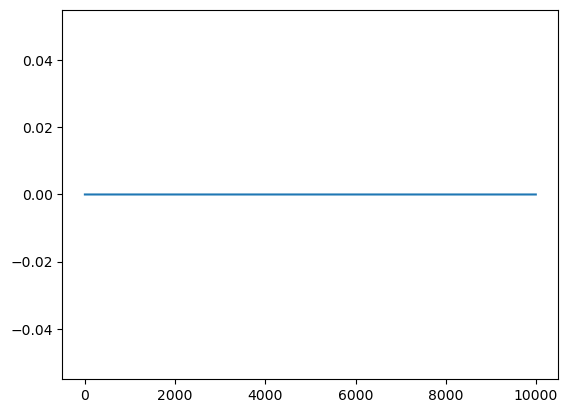

In [139]:
df.isnull().sum(axis=1).plot()

No Null values

<Axes: >

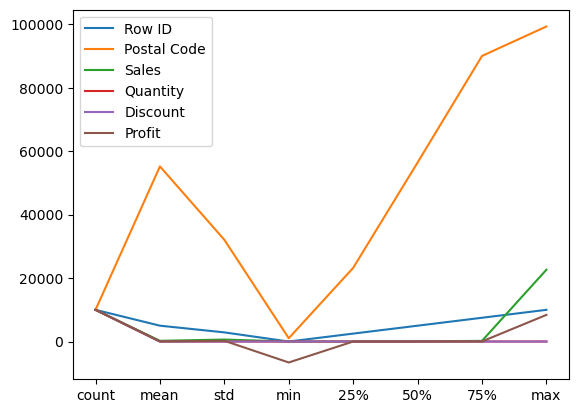

In [116]:
df.describe().plot()


#### 1.2 Data Cleaning 

In [140]:
# Dropping Row ID
df = df.drop(columns=['Row ID'])

In [141]:
# Checking for Duplicates 
if df.duplicated().sum() > 0:
    print('Duplicate exits')
else:
    print("No duplicates")

Duplicate exits


In [142]:
duplicates = df[df.duplicated(keep=False)]
duplicates

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3405,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588
3406,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [143]:
# Dropping Duplicate row
df.drop_duplicates(inplace=True)

In [148]:
data_columns = ['Order Date', 'Ship Date']
for col in data_columns:
    df[col] = pd.to_datetime(df[col])

In [151]:
invalid_shipping = df[df['Ship Date'] < df['Order Date']]

print(invalid_shipping)

Empty DataFrame
Columns: [Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country, City, State, Postal Code, Region, Product ID, Category, Sub-Category, Product Name, Sales, Quantity, Discount, Profit]
Index: []


#### Converting Data Types

In [123]:
df['Customer ID'] = df['Customer ID'].astype('category')

#### 1.3 Feature Engineering
* Creating New Feature : Order Year,Month, Order Day

In [176]:
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Day'] = df['Order Date'].dt.strftime('%a')
df['Order Month(N)'] = df['Order Date'].dt.month_name()
df['Ship Day'] = df['Ship Date'].dt.strftime('%a')

In [153]:
def investigate_sales_discount(df):
    print("Sample of Sales and Discount:")
    print(df[['Sales', 'Discount', 'Quantity']].head())
    
    print("\nDiscount range:")
    print(df['Discount'].describe())
    
    print("\nCalculating potential Revenue:")
    df['Potential Revenue'] = df['Sales'] * (1-df['Discount'])
    print(df[['Sales', 'Discount', 'Potential Revenue']].head())
    
    print("\nComparing Sales and Potential Revenue:")
    print("Total Sales: ", df['Sales'].sum())
    print("Total Potential Revenue: ", df['Potential Revenue'].sum())
    
investigate_sales_discount(df)
    
    

Sample of Sales and Discount:
      Sales  Discount  Quantity
0  261.9600      0.00         2
1  731.9400      0.00         3
2   14.6200      0.00         2
3  957.5775      0.45         5
4   22.3680      0.20         2

Discount range:
count    9993.000000
mean        0.156188
std         0.206457
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: Discount, dtype: float64

Calculating potential Revenue:
      Sales  Discount  Potential Revenue
0  261.9600      0.00         261.960000
1  731.9400      0.00         731.940000
2   14.6200      0.00          14.620000
3  957.5775      0.45         526.667625
4   22.3680      0.20          17.894400

Comparing Sales and Potential Revenue:
Total Sales:  2296919.4883000003
Total Potential Revenue:  1974421.7655590002


###### Sales column is likely representing Revenue (or Net Sales).
###### The Discount column shows the rate of discount applied to the original price

In [154]:
df.drop('Potential Revenue', axis=1, inplace=True)

* Calculating Customer Lifetime Value (CLV)

In [155]:
# Calculate customer lifespan
def calculate_average_lifespan(df):
    lifespan = df.groupby('Customer ID')['Order Date'].agg(['min', 'max'])
    lifespan['Lifespan (days)'] = (lifespan['max'] - lifespan['min']).dt.days
    average_lifespan = lifespan['Lifespan (days)'].mean()
    average_lifespan_years = average_lifespan / 365  
    return average_lifespan_years

ave_lifespan = calculate_average_lifespan(df)
print(f"\nAverage Lifespan: {ave_lifespan:.2f} years")


Average Lifespan: 2.74 years


In [156]:
avg_order_value = df.groupby('Customer ID',observed=True)['Sales'].mean()
purchase_frequency = df.groupby('Customer ID',observed=True)['Order ID'].count()

clv = avg_order_value * purchase_frequency * ave_lifespan
clv = clv.rename('CLV')
df = df.merge(clv, on='Customer ID', how='left')

In [157]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Order Year', 'Order Month',
       'Order Day', 'Order Month(N)', 'CLV'],
      dtype='object')

In [158]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month,Order Day,Order Month(N),CLV
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,Tue,November,3146.243079
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,Tue,November,3146.243079
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,Sun,June,3066.005363
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,Sun,October,7127.853161
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,Sun,October,7127.853161


# 2. Exploratory Analysis

Skewness of Postal Code: -0.12862858810335934
Kurtosis of Postal Code: -1.4931118549547797


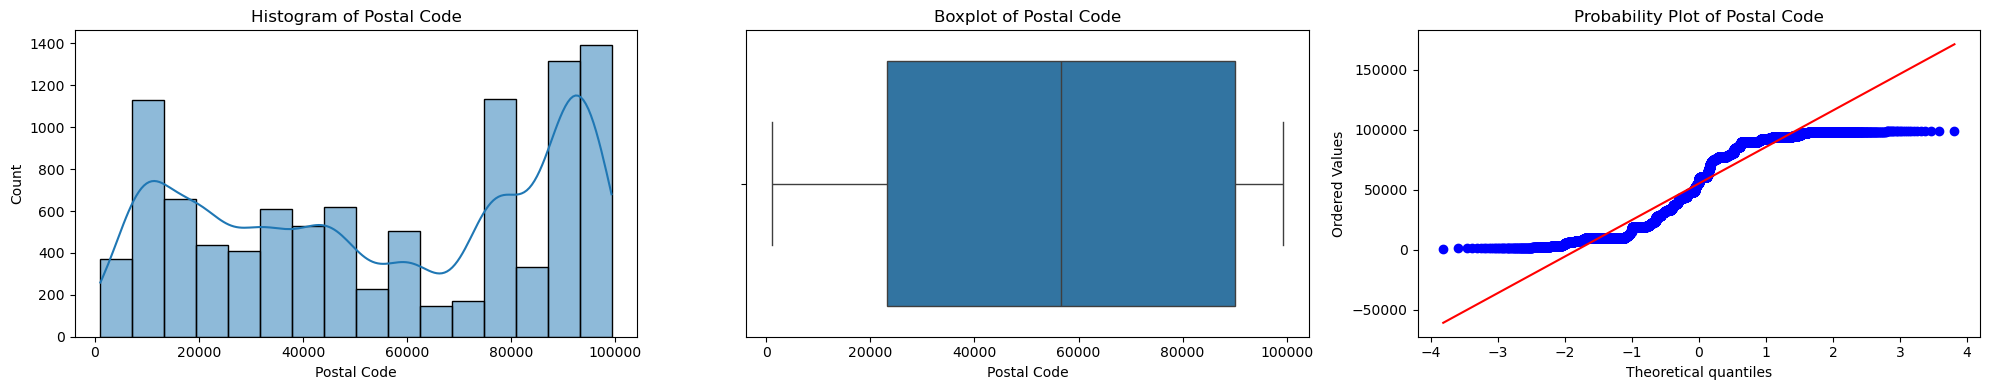

Skewness of Sales: 12.972141558363266
Kurtosis of Sales: 305.2817697063499


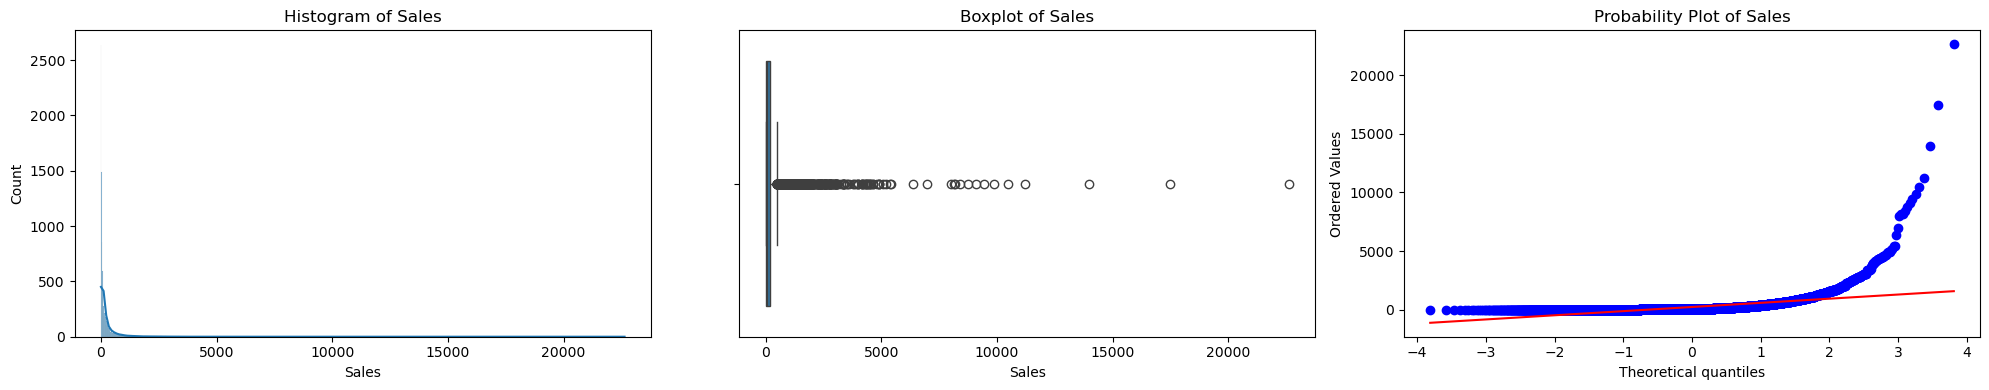

Skewness of Quantity: 1.2784155399852233
Kurtosis of Quantity: 1.9915827160047757


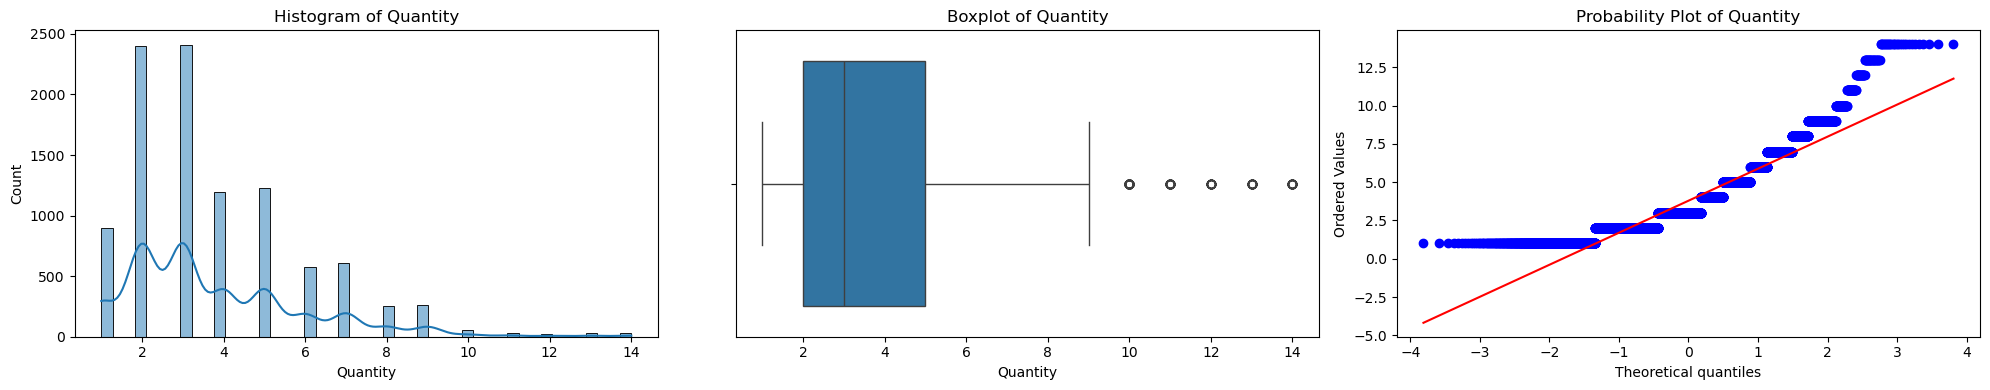

Skewness of Discount: 1.6845084876700462
Kurtosis of Discount: 2.409976524801519


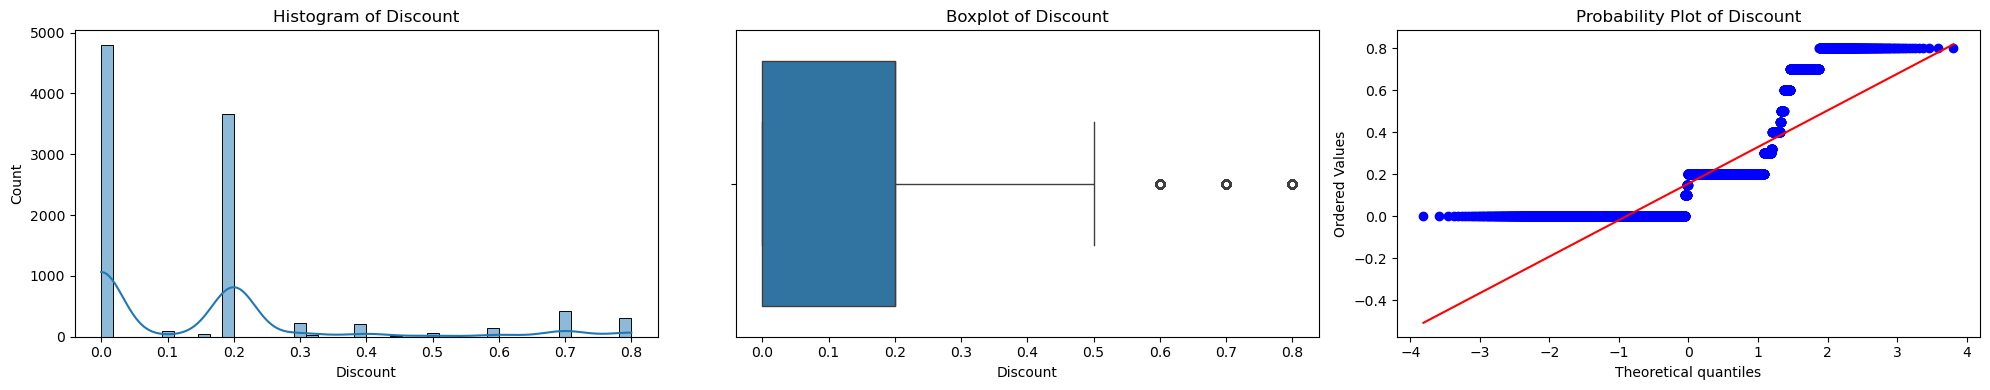

Skewness of Profit: 7.561035996041442
Kurtosis of Profit: 397.15038474389235


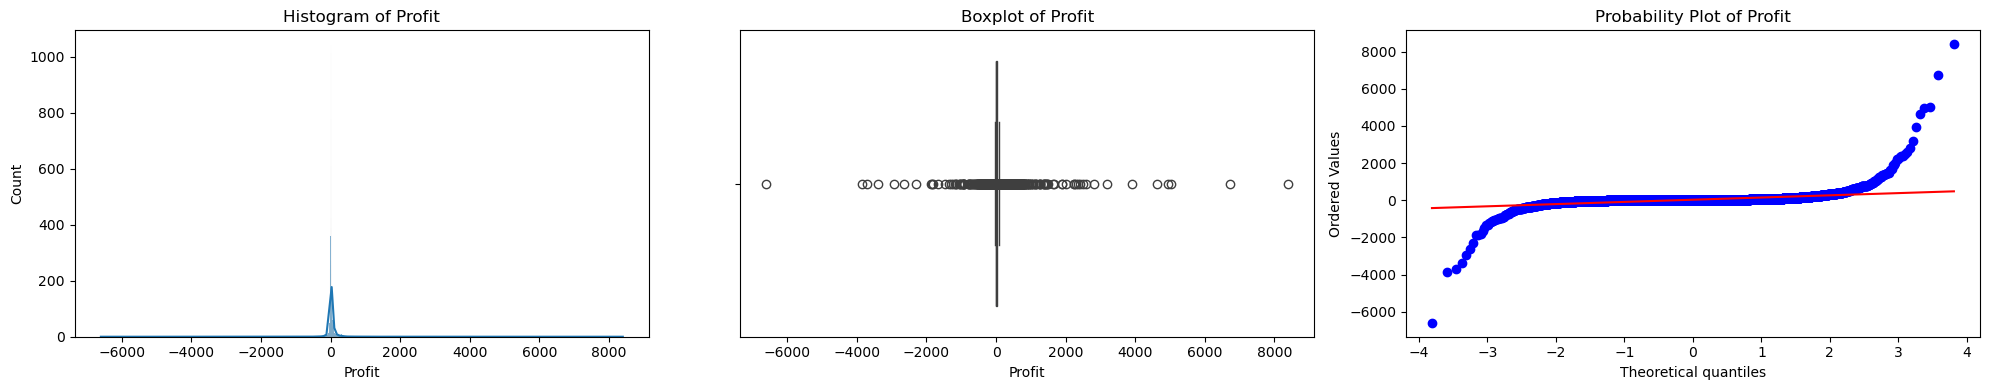

Skewness of Order Year: -0.28300849064497824
Kurtosis of Order Year: -1.307317240944817


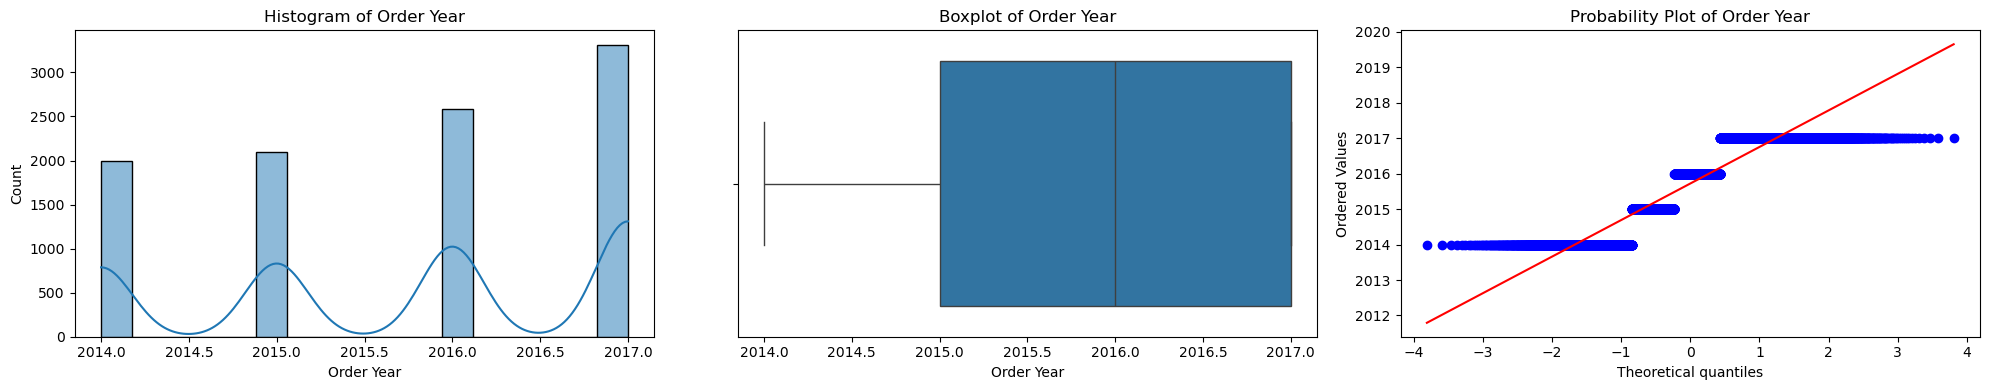

Skewness of Order Month: -0.4299503505299069
Kurtosis of Order Month: -0.990969390033801


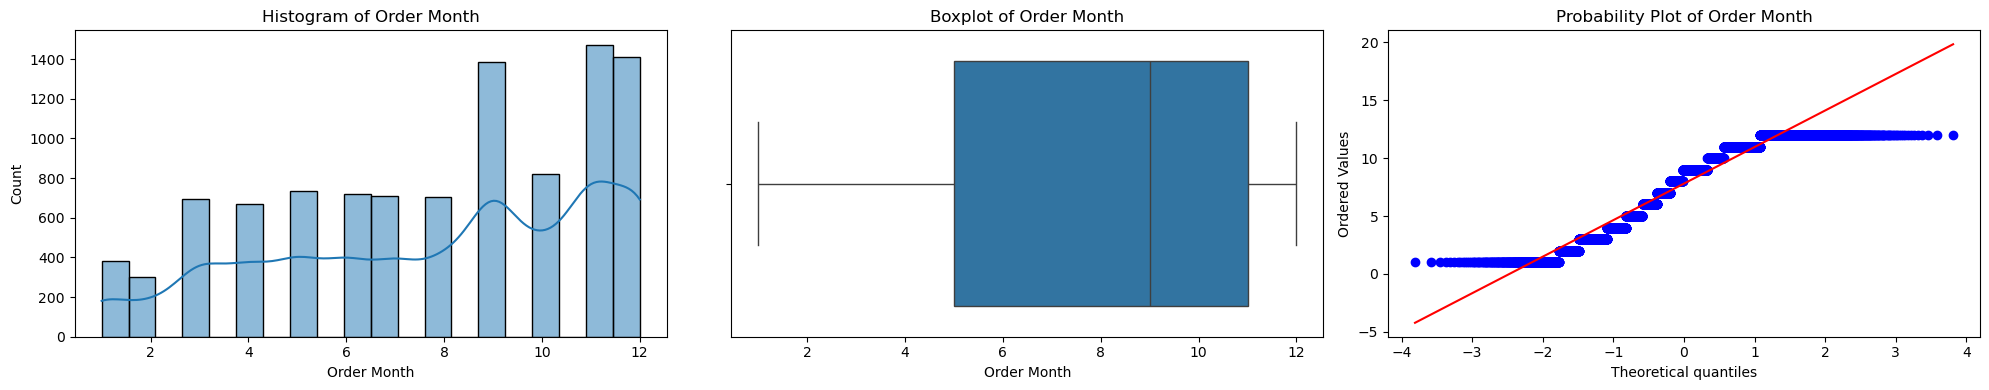

Skewness of CLV: 2.076926804666209
Kurtosis of CLV: 7.392983893625118


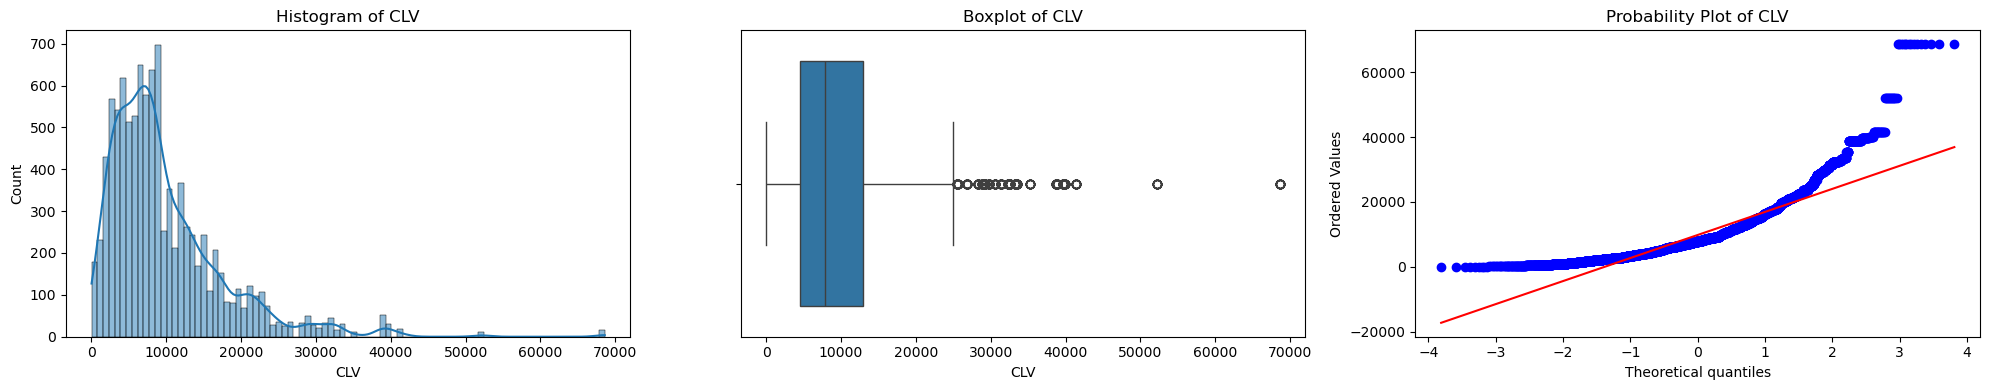

In [159]:
for col in df.select_dtypes(np.number).columns:
    print(f"Skewness of {col}:", df[col].skew())
    print(f"Kurtosis of {col}:", df[col].kurt())
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].set_title(f"Histogram of {col}")
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot of {col}")
    stats.probplot(df[col], plot=axes[2])
    axes[2].set_title(f"Probability Plot of {col}")
    plt.tight_layout()
    plt.show()

### Customer
* How many Unique customer does the data have?
* What is the common customer type?
* Which customer type buys the most?
* How many orders did each customer make?
* What is the average order value per customer?
* What is the highest CLV for a customer, and who are the top customers by clv?

In [31]:
# Types of customers

types_of_customers = df['Segment'].unique()

print(types_of_customers)

['Consumer' 'Corporate' 'Home Office']


In [32]:
number_of_customers = df['Segment'].value_counts().reset_index()
number_of_customers = number_of_customers.rename(columns={'Segment': 'Type of Customers'})

In [33]:
print(number_of_customers)

  Type of Customers  count
0          Consumer   5191
1         Corporate   3020
2       Home Office   1782


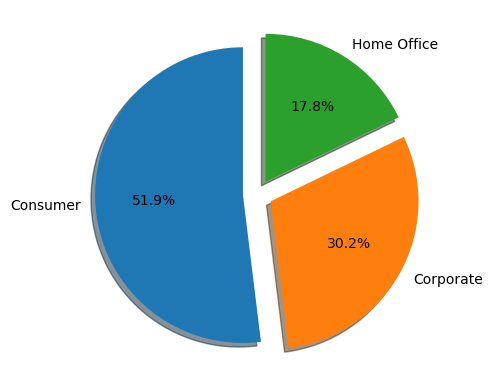

In [104]:
plt.pie(number_of_customers['count'], labels=number_of_customers['Type of Customers'], autopct='%1.1f%%', shadow=True, explode=[0.1,0.1,0.1], startangle=90);

Majority customers are from consumer and the least number of customers are Home Office.

In [35]:
# Which Customer type buys the most?
customer_by_order = df.groupby('Segment',observed=True)['Order ID'].count().reset_index()
customer_by_order = customer_by_order.rename(columns={'Order ID': 'Total Order'})
print(customer_by_order)

       Segment  Total Order
0     Consumer         5191
1    Corporate         3020
2  Home Office         1782


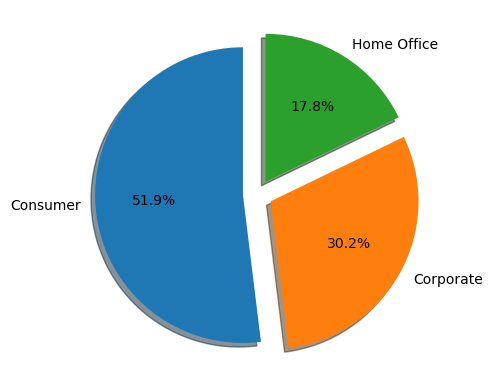

In [105]:
plt.pie(customer_by_order['Total Order'],labels=customer_by_order['Segment'],autopct='%1.1f%%', shadow=True, explode=[0.1,0.1,0.1], startangle=90);

### Sales 
* Which Customer Type brings the most revenue?
* Number of Sales made in each time of the day per weekday
* What is the average discount provided per customer segment?
* Which month saw the highest sales?

  Type of Customers         Sales
0          Consumer  1.161401e+06
1         Corporate  7.061464e+05
2       Home Office  4.293718e+05


<BarContainer object of 3 artists>

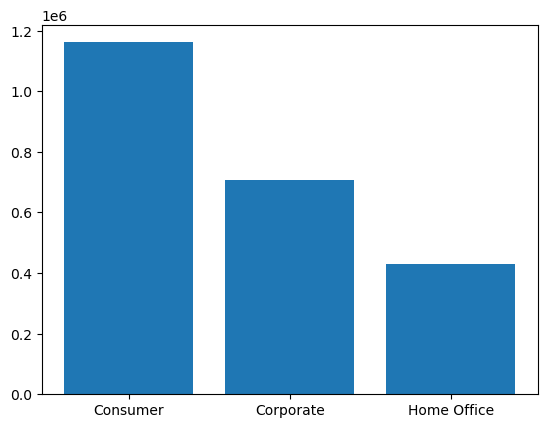

In [63]:
# Which customer type brings the most revenue
sales_per_segment = df.groupby('Segment', observed=True)['Sales'].sum().reset_index()
sales_per_segment = sales_per_segment.rename(columns={'Segment': 'Type of Customers'})

print(sales_per_segment)

plt.bar(sales_per_segment['Type of Customers'], sales_per_segment['Sales'])

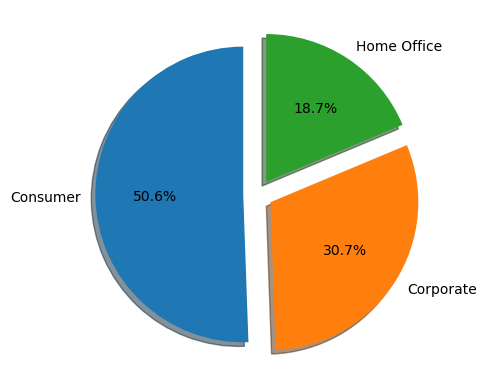

In [162]:
plt.pie(sales_per_segment['Sales'], labels=sales_per_segment['Type of Customers'], autopct='%1.1f%%', shadow=True, explode=[0.1,0.1,0.1], startangle=90);

In [65]:
# Number of Sales made each day 
sales_per_weekday = df.groupby('Order Day', observed=True)['Sales'].count().reset_index()
sales_per_weekday = sales_per_weekday.sort_values(by='Sales', ascending=False)
print(sales_per_weekday)

  Order Day  Sales
1       Mon   1871
0       Fri   1818
3       Sun   1710
2       Sat   1655
4       Thu   1463
5       Tue   1106
6       Wed    370


<BarContainer object of 7 artists>

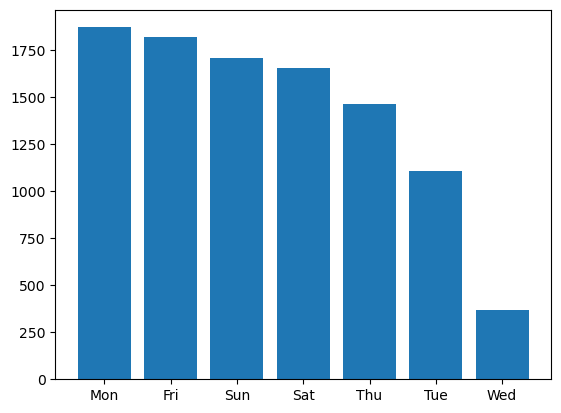

In [66]:
plt.bar(sales_per_weekday['Order Day'], sales_per_weekday['Sales'])

* Monday tops the chart with sales 1,871, closely followed by Friday with 1,818. These ciuld be peak shopping days, possibly reflecting customer behavior patterns like begining-of-week planning or end-of-week purchases. 
* Weekend Sales (Sunday and Saturda) show strong slaes, indicating a significant portion of sales during the weekend. 
* Tuesday and Wednesday have noticeably lower sales compared to other days, suggeseting these are off-peak shopping days. 
* Thursday sales are mid-range, brifging the gap between peak and low days. 

In [ ]:
# Top 5 Days with the highest number of sales

sales_per_weekday.head(5)


,Order Day,Sales
1,Mon,1871
0,Fri,1818
3,Sun,1710
2,Sat,1655
4,Thu,1463


In [164]:
# Discount provided per customer
discount_per_customer = df.groupby(['Customer ID', 'Customer Name', 'Segment'], observed=True)['Discount'].sum().reset_index()
discount_per_customer = discount_per_customer.sort_values(by='Discount',ascending=False)
print(discount_per_customer.head(10)) 

    Customer ID        Customer Name      Segment  Discount
791    ZC-21910     Zuschuss Carroll     Consumer      7.90
787    WB-21850        William Brown     Consumer      7.60
147    CK-12205  Chloris Kastensmidt     Consumer      7.50
245    EA-14035        Erin Ashbrook    Corporate      7.50
450    LC-16870        Lena Cacioppo     Consumer      7.20
355    JE-15715           Joe Elijah     Consumer      7.10
380    JK-15730        Joe Kamberova     Consumer      6.65
433    KL-16555        Kelly Lampkin    Corporate      6.50
679    SC-20770   Stewart Carmichael    Corporate      6.40
472    LS-16975     Lindsay Shagiari  Home Office      6.20


### Profit 
* Which Customer Type provides the most profit?
* Which products or categories contribute the most overall profit?
* How discount Rates affects overall profitability across different products or categories?

       Segment       Profit
0     Consumer  134119.2092
1    Corporate   91979.1340
2  Home Office   60310.7373


<BarContainer object of 3 artists>

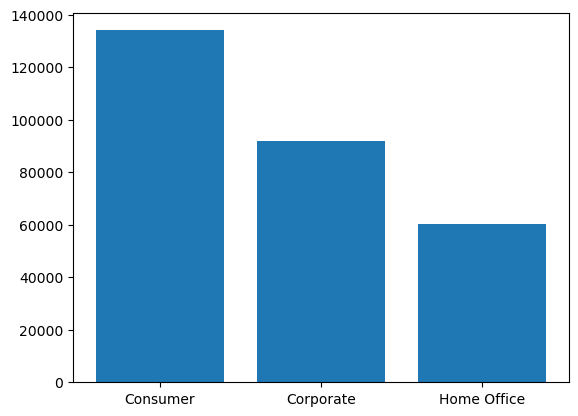

In [71]:
profit_per_segment = df.groupby('Segment')['Profit'].sum().reset_index()

print(profit_per_segment)
plt.bar(profit_per_segment['Segment'], profit_per_segment['Profit'])

* The consumer segment generates the highes profit. 
* The Corporate segment ahile not as high as Consumers, this segment still plays vital role and could reflect business clients making bulk or frequent purchases. 
* Home Office segmenet while contributing less than the other segments, it might stil represent a niche with growth potential. 

In [72]:
# Product or categories contrubution on the profit
profit_per_categories = df.groupby('Category', observed=True)['Profit'].sum().reset_index()
profit_per_categories = profit_per_categories.rename(columns={'Profit':'Total Profit'})
profit_per_categories = profit_per_categories.sort_values(by='Total Profit', ascending=False)
print(profit_per_categories)

          Category  Total Profit
2       Technology   145454.9481
1  Office Supplies   122490.8008
0        Furniture    18463.3316


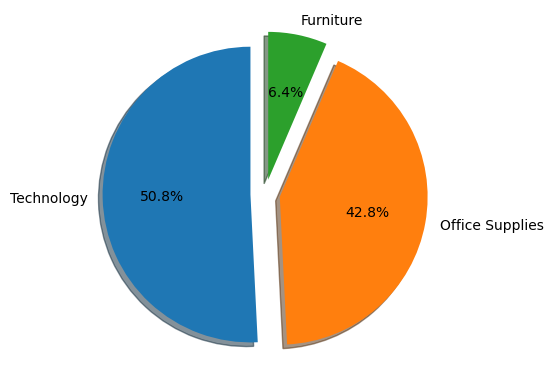

In [185]:
plt.pie(profit_per_categories['Total Profit'], labels=profit_per_categories['Category'], autopct='%1.1f%%', shadow=True, explode=[0.1,0.1,0.1], startangle=90);

* Technology is the most profitable, contributing the highest profit among the three. 
* Office supplies comes in second, generating a substantial amount of profit. 
* Furniture is the least profitable. 

In [191]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Order Year', 'Order Month',
       'Order Day', 'Order Month(N)', 'CLV', 'Delivery Time (days)',
       'Ship Day'],
      dtype='object')

In [193]:
# Sub Category contribution on profit 
profit_per_sbCatgory = df.groupby(['Category','Sub-Category'], observed=True)['Profit'].sum().reset_index()
profit_per_sbCatgory = profit_per_sbCatgory.sort_values(by='Profit', ascending=True)
profit_per_sbCatgory = profit_per_sbCatgory.rename(columns={'Profit':'Total Profit'})
print(profit_per_sbCatgory)

           Category Sub-Category  Total Profit
3         Furniture       Tables   -17725.4811
0         Furniture    Bookcases    -3472.5560
12  Office Supplies     Supplies    -1189.0995
8   Office Supplies    Fasteners      949.5182
15       Technology     Machines     3384.7569
9   Office Supplies       Labels     5546.2540
5   Office Supplies          Art     6527.7870
7   Office Supplies    Envelopes     6964.1767
2         Furniture  Furnishings    13059.1436
4   Office Supplies   Appliances    18138.0054
11  Office Supplies      Storage    21278.8264
1         Furniture       Chairs    26602.2251
6   Office Supplies      Binders    30221.7633
10  Office Supplies        Paper    34053.5693
13       Technology  Accessories    41936.6357
16       Technology       Phones    44515.7306
14       Technology      Copiers    55617.8249


<BarContainer object of 17 artists>

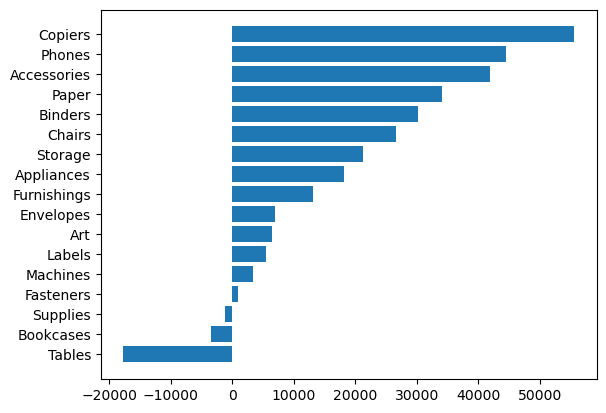

In [194]:
plt.barh(profit_per_sbCatgory['Sub-Category'], profit_per_sbCatgory['Total Profit'])

In [76]:
# Affect of discount rate overall profitability across different products or categories

corre = df[['Discount', 'Profit']].corr()

print(corre)


          Discount    Profit
Discount  1.000000 -0.219481
Profit   -0.219481  1.000000


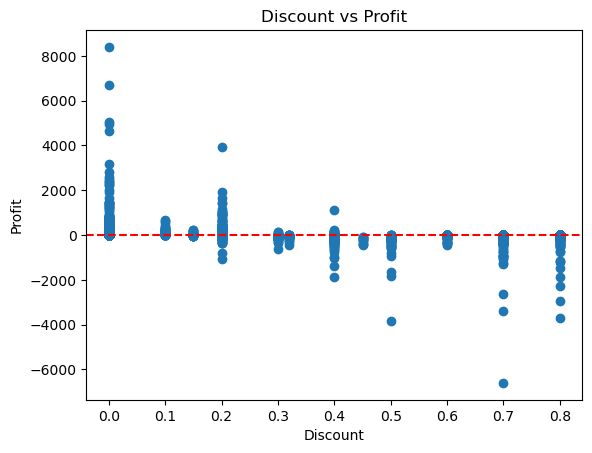

In [197]:
plt.scatter(df['Discount'], df['Profit'])
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.axhline(0, color='red', linestyle='--')
plt.show()

In [78]:
customer_clv = df.groupby('Customer Name')['CLV'].sum().reset_index()
customer_high_CLV = customer_clv.sort_values(by='CLV', ascending=False)
print(customer_high_CLV.head(10))

     Customer Name           CLV
441   Ken Lonsdale  1.125858e+06
686    Sean Miller  1.028807e+06
689    Seth Vernon  1.005321e+06
312      Greg Tran  9.388048e+05
387       John Lee  9.125507e+05
249   Edward Hooks  9.036518e+05
671   Sanjit Chand  8.521169e+05
169    Clay Ludtke  8.343805e+05
6    Adrian Barton  7.927954e+05
622   Raymond Buch  7.452522e+05


       Segment           CLV
0     Consumer  5.116180e+07
1    Corporate  2.973952e+07
2  Home Office  1.743124e+07


<BarContainer object of 3 artists>

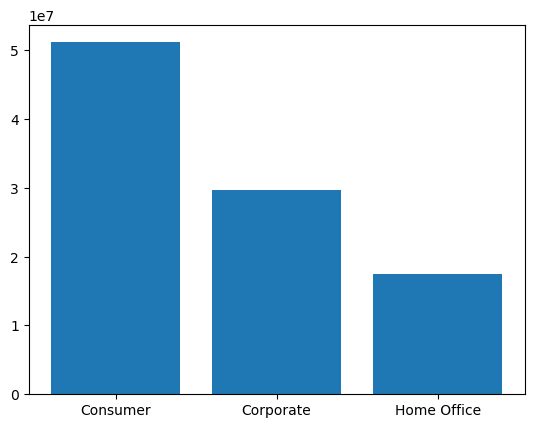

In [79]:
segment_clv = df.groupby('Segment')['CLV'].sum().reset_index()
print(segment_clv)
plt.bar(segment_clv['Segment'], segment_clv['CLV'])

#### The consumer segment significantly outperforms other segments in terms of fianacial metrics:
* It contributes the most to overall Revenue, reflecting its dominant role in driving sales.
* The segment has the Highest Customer Lifetime Value (CLV).
* It also earns highest profits, further confirming its importance to the business's profitability.


In [200]:
# Customer Order Frequency
customer_order_frequency = df.groupby(['Customer ID', 'Customer Name', 'Segment'], observed=True)['Order ID'].count().reset_index()

In [201]:
customer_order_frequency.rename(columns={'Order ID': 'Total Orders'}, inplace=True)
repeat_customers = customer_order_frequency[customer_order_frequency['Total Orders'] >= 1]
repeat_customer_sorted = repeat_customers.sort_values(by='Total Orders', ascending=False)
print(repeat_customer_sorted.head(10).reset_index(drop=True))

  Customer ID        Customer Name      Segment  Total Orders
0    WB-21850        William Brown     Consumer            37
1    PP-18955           Paul Prost  Home Office            34
2    JL-15835             John Lee     Consumer            34
3    MA-17560         Matt Abelman  Home Office            34
4    SV-20365          Seth Vernon     Consumer            32
5    JD-15895     Jonathan Doherty    Corporate            32
6    CK-12205  Chloris Kastensmidt     Consumer            32
7    EH-13765         Edward Hooks    Corporate            32
8    EP-13915           Emily Phan     Consumer            31
9    ZC-21910     Zuschuss Carroll     Consumer            31


In [97]:
# Top Spenders 

customer_sales = df.groupby(['Customer ID', 'Customer Name', 'Segment','Profit'],observed=True)['Sales'].sum().reset_index()
top_spenders = customer_sales.sort_values(by='Sales', ascending=False)
print(top_spenders.head(10).reset_index(drop=True))

  Customer ID       Customer Name      Segment     Profit      Sales
0    SM-20320         Sean Miller  Home Office -1811.0784  22638.480
1    TC-20980        Tamara Chand    Corporate  8399.9760  17499.950
2    RB-19360        Raymond Buch     Consumer  6719.9808  13999.960
3    TA-21385        Tom Ashbrook  Home Office  3919.9888  11199.968
4    HL-15040        Hunter Lopez     Consumer  5039.9856  10499.970
5    AB-10105       Adrian Barton     Consumer  4946.3700   9892.740
6    SC-20095        Sanjit Chand     Consumer  4630.4755   9449.950
7    BS-11365        Bill Shonely    Corporate  2365.9818   9099.930
8    SE-20110        Sanjit Engle     Consumer  2799.9840   8749.950
9    CC-12370  Christopher Conant     Consumer  1119.9968   8399.976


In [86]:
top_spender_id = top_spenders['Customer ID'].iloc[0]
top_spender_discount = df[df['Customer ID'] == top_spender_id]['Discount']

print(top_spender_discount.describe())

count    15.000000
mean      0.246667
std       0.184649
min       0.000000
25%       0.200000
50%       0.200000
75%       0.200000
max       0.700000
Name: Discount, dtype: float64


In [202]:
# Spending behaviour
avg_customer_sales = df.groupby(['Customer ID', 'Customer Name', 'Segment','Profit'],observed=True)['Sales'].mean().reset_index()

avg_top_spenders = avg_customer_sales.sort_values(by='Sales', ascending=False)
print(avg_top_spenders.head(10).reset_index(drop=True))

  Customer ID       Customer Name      Segment     Profit      Sales
0    SM-20320         Sean Miller  Home Office -1811.0784  22638.480
1    TC-20980        Tamara Chand    Corporate  8399.9760  17499.950
2    RB-19360        Raymond Buch     Consumer  6719.9808  13999.960
3    TA-21385        Tom Ashbrook  Home Office  3919.9888  11199.968
4    HL-15040        Hunter Lopez     Consumer  5039.9856  10499.970
5    AB-10105       Adrian Barton     Consumer  4946.3700   9892.740
6    SC-20095        Sanjit Chand     Consumer  4630.4755   9449.950
7    BS-11365        Bill Shonely    Corporate  2365.9818   9099.930
8    SE-20110        Sanjit Engle     Consumer  2799.9840   8749.950
9    CC-12370  Christopher Conant     Consumer  1119.9968   8399.976


# Shipment

* How are orders distributed across different ship modes?
* Which ship mode contributes the most to total sales revenue?
* Which ship mode generates the highest profit?
* Delivery time Efficiency
* Are there any seasonal variations in the preference for different ship modes?
* Is there any relationship between the chosen ship mode and quantity of orders?

In [166]:
# Ship Mode

types_of_ship_modes = df['Ship Mode'].unique()
print(types_of_ship_modes)

['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [167]:
shipping_mode = df['Ship Mode'].value_counts().reset_index()
shipping_mode = shipping_mode.rename(columns={ 'index': 'Use Frequency','Ship Mode': 'Mode of Shipment', 'count': 'Use Frequency'})
print(shipping_mode)

  Mode of Shipment  Use Frequency
0   Standard Class           5967
1     Second Class           1945
2      First Class           1538
3         Same Day            543


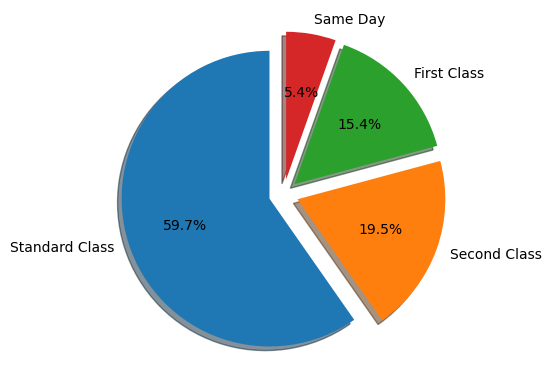

In [186]:
plt.pie(shipping_mode['Use Frequency'], labels=shipping_mode['Mode of Shipment'], autopct='%1.1f%%', shadow=True, explode=[0.1,0.1,0.1,0.1], startangle=90);

In [203]:
# Ship mode vs sales revenue and Profit

sales_per_ship = df.groupby(['Ship Mode'], observed=True)[['Sales', 'Profit']].sum().reset_index()
sales_per_ship = sales_per_ship.sort_values(by='Sales', ascending=False)
print(sales_per_ship)

        Ship Mode         Sales       Profit
3  Standard Class  1.357934e+06  164100.8463
2    Second Class  4.591936e+05   57446.6354
0     First Class  3.514284e+05   48969.8399
1        Same Day  1.283631e+05   15891.7589


* Standard Class dominates sales, contributing the largest portion of revenue.
* Standard Class also leads in profit, which significantly higher thata the other shipment modes. 

While Standard Class generates the most profit in absolute terms, its profit margin might not be the hoghest. 

In [208]:
# Calculating profit margin for ship mode and comparing

sales_per_ship['Profit Margin'] = (sales_per_ship['Profit'] / sales_per_ship['Sales']) * 100
sales_per_ship = sales_per_ship.sort_values(by='Profit Margin', ascending=False)
sales_per_ship

,Ship Mode,Sales,Profit,Profit Margin
0,First Class,3.514284e+05,48969.8399,13.934513
2,Second Class,4.591936e+05,57446.6354,12.510331
1,Same Day,1.283631e+05,15891.7589,12.380315
3,Standard Class,1.357934e+06,164100.8463,12.084593


* First Class is the most profitable in percentage terms with a margin of 13.93%, indicating higher efficiency or premium pricing. 
* Second Class and Same Day have similar margins but Second Class has a nuch higher sales volumn. 
* Standard Class, despite its ovewhelming dominance in sales and profit, has the lowest profit margin. This indicates that while it generates the most revenue, it might be less efficient compared to First Class.

In [170]:
# Delivery Efficiency

df['Delivery Time (days)'] = (df['Ship Date'] - df['Order Date']).dt.days

In [171]:
deliTime_by_Shipment = df.groupby(['Ship Mode'], observed=True)['Delivery Time (days)'].mean().reset_index()
deliTime_by_Shipment = deliTime_by_Shipment.sort_values(by=['Delivery Time (days)'], ascending=False)
print(deliTime_by_Shipment)

        Ship Mode  Delivery Time (days)
3  Standard Class              5.006704
2    Second Class              3.238046
0     First Class              2.182705
1        Same Day              0.044199


In [209]:
# Shipment vs Weekday
# Ship Day 
ship_mode_frequency = df.groupby(['Ship Day', 'Ship Mode']).size().unstack(fill_value=0)
print(ship_mode_frequency)


Ship Mode  First Class  Same Day  Second Class  Standard Class
Ship Day                                                      
Fri                169       112           211            1070
Mon                228        85           271             657
Sat                167        79           257             926
Sun                253       117           223             594
Thu                138        84           307             886
Tue                297        43           306             920
Wed                286        23           370             914


In [ ]:
# Seasonal Pattern
ship_mode_by_month = df.groupby(['Order Month(N)', 'Ship Mode']).size().unstack(fill_value=0)
print(ship_mode_by_month)

Ship Mode       First Class  Same Day  Second Class  Standard Class
Order Month(N)                                                     
April                   107        18           112             430
August                  109        34           135             428
December                214        72           292             830
February                 46        14            62             178
January                  40         4            86             251
July                     99        46           143             422
June                    130        29           143             415
March                   108        54           154             380
May                     118        47           111             459
November                211        72           299             889
October                 145        67           148             459
September               211        86           260             826


In [ ]:
# Correlation Between Ship Mode and Quantity
avg_quantity_per_ship_mode = df.groupby('Ship Mode')['Quantity'].mean().reset_index()
avg_quantity_per_ship_mode = avg_quantity_per_ship_mode.sort_values(by='Quantity', ascending=False)

print(avg_quantity_per_ship_mode)


        Ship Mode  Quantity
3  Standard Class  3.820178
2    Second Class  3.816452
0     First Class  3.701560
1        Same Day  3.609576


Standard Class is the most frequently chosen shipping mode, it makes sense that it would also show higher average order quantity, simply due to the larger number of orders placed with that mode. The relationship between frequency and average quantity can be driven by the fact that more customers are choosing Standard Class, which naturally lead to higher totals and averages for that shipping mode. 

# Region or State
 *  Which regions or states have the highest and lowest sales figures?
 * How does profit vary across different regions or states?
 * Are there differences in shipping times across regions or states?



In [ ]:
# States
state = df['State'].value_counts().reset_index()
state = state.rename(columns={'index': 'State', 'count': 'Number of Customers'})
print(state.head(20))

             State  Number of Customers
0       California                 2001
1         New York                 1128
2            Texas                  985
3     Pennsylvania                  587
4       Washington                  506
5         Illinois                  492
6             Ohio                  468
7          Florida                  383
8         Michigan                  255
9   North Carolina                  249
10         Arizona                  224
11        Virginia                  224
12         Georgia                  184
13       Tennessee                  183
14        Colorado                  182
15         Indiana                  149
16        Kentucky                  139
17   Massachusetts                  135
18      New Jersey                  130
19          Oregon                  124


In [ ]:
city = df['City'].value_counts().reset_index()
print(city.head(20))

             City  count
0   New York City    915
1     Los Angeles    747
2    Philadelphia    537
3   San Francisco    510
4         Seattle    428
5         Houston    377
6         Chicago    314
7        Columbus    221
8       San Diego    170
9     Springfield    163
10         Dallas    157
11   Jacksonville    125
12        Detroit    115
13         Newark     95
14       Richmond     90
15        Jackson     82
16       Columbia     81
17         Aurora     68
18        Phoenix     63
19     Long Beach     61


In [ ]:
# Top States by Sales
state_sales = df.groupby(['State'],observed=True)['Sales'].mean().reset_index()
top_state_sales = state_sales.sort_values(by='Sales', ascending=False)
print(top_state_sales.head(10).reset_index(drop=True))

          State        Sales
0       Wyoming  1603.136000
1       Vermont   811.760909
2        Nevada   428.951333
3  Rhode Island   404.070643
4       Montana   372.623467
5       Indiana   359.431946
6      Missouri   336.441667
7     Minnesota   335.541011
8       Alabama   319.846557
9      Virginia   315.342500


In [ ]:
# Top states by Profit
state_profit = df.groupby(['State'], observed=True)['Profit'].sum().reset_index()
state_profit = state_profit.sort_values(by='Profit', ascending=False)
print(state_profit.head(10).reset_index(drop=True))

        State      Profit
0  California  76381.3871
1    New York  74038.5486
2  Washington  33402.6517
3    Michigan  24463.1876
4    Virginia  18597.9504
5     Indiana  18382.9363
6     Georgia  16250.0433
7    Kentucky  11199.6966
8   Minnesota  10823.1874
9    Delaware   9977.3748


In [ ]:
city_sales = df.groupby(['City'],observed=True)['Sales'].sum().reset_index()
top_city_sales = city_sales.sort_values(by='Sales', ascending=False)
print(top_city_sales.head(20).reset_index(drop=True))

             City        Sales
0   New York City  256368.1610
1     Los Angeles  175851.3410
2         Seattle  119540.7420
3   San Francisco  112669.0920
4    Philadelphia  109077.0130
5         Houston   64504.7604
6         Chicago   48539.5410
7       San Diego   47521.0290
8    Jacksonville   44713.1830
9     Springfield   43054.3420
10        Detroit   42446.9440
11       Columbus   38424.8710
12         Newark   28576.1190
13       Columbia   25283.3240
14      Lafayette   25036.2000
15        Jackson   24963.8580
16    San Antonio   21843.5280
17     Burlington   21668.0820
18      Arlington   20214.5320
19         Dallas   20131.9322


In [ ]:
# City by Profit
city_profit = df.groupby(['City'],observed=True)['Profit'].sum().reset_index()
top_city_profit = city_profit.sort_values(by='Profit', ascending=False)
print(top_city_profit.head(20).reset_index(drop=True))

             City      Profit
0   New York City  62036.9837
1     Los Angeles  30440.7579
2         Seattle  29156.0967
3   San Francisco  17507.3854
4         Detroit  13181.7908
5       Lafayette  10018.3876
6         Jackson   7581.6828
7         Atlanta   6993.6629
8     Minneapolis   6824.5846
9       San Diego   6377.1960
10    Springfield   6200.6974
11       Columbus   5909.1601
12         Newark   5793.7588
13       Columbia   5606.1167
14       Richmond   5567.2486
15     Providence   5505.6569
16      Henderson   4911.8609
17      Arlington   4169.6969
18       Lakewood   3234.0278
19      Milwaukee   2793.0851


In [ ]:
state_city_sales = df.groupby(['State', 'City'],observed=True)['Sales'].sum().reset_index()
print(state_city_sales.head(10))

     State           City     Sales
0  Alabama         Auburn  1766.830
1  Alabama        Decatur  3374.820
2  Alabama       Florence  1997.350
3  Alabama         Hoover   525.850
4  Alabama     Huntsville  2484.370
5  Alabama         Mobile  5462.990
6  Alabama     Montgomery  3722.730
7  Alabama     Tuscaloosa   175.700
8  Arizona       Avondale   946.808
9  Arizona  Bullhead City    22.288


In [ ]:
state_city_profit = df.groupby(['State', 'City'], observed=True)['Profit'].sum().reset_index()
print(state_city_profit.head(10))

     State           City     Profit
0  Alabama         Auburn   452.6071
1  Alabama        Decatur  1000.0881
2  Alabama       Florence   248.6589
3  Alabama         Hoover    18.7173
4  Alabama     Huntsville  1005.2572
5  Alabama         Mobile  2175.8292
6  Alabama     Montgomery   834.6571
7  Alabama     Tuscaloosa    51.0104
8  Arizona       Avondale    76.1690
9  Arizona  Bullhead City     6.7232


In [ ]:
# Region 

region_sales = df.groupby(['Region'], observed=True)['Sales'].sum().reset_index()
region_sales = region_sales.sort_values(by='Sales', ascending=False)

print(region_sales)

    Region        Sales
3     West  725457.8245
1     East  678499.8680
0  Central  501239.8908
2    South  391721.9050


# Product
* Types of Product
* Which PRoduct category generates the highest revenue

In [ ]:
products = df['Category'].unique()
print(products)

['Furniture' 'Office Supplies' 'Technology']


In [ ]:
product_subcategory = df['Sub-Category'].unique()
print(product_subcategory)

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [ ]:
subcategory_count = df.groupby('Category')['Sub-Category'].nunique().reset_index()
subcategory_count = subcategory_count.sort_values(by='Sub-Category', ascending=False)
print(subcategory_count)

          Category  Sub-Category
1  Office Supplies             9
0        Furniture             4
2       Technology             4


In [ ]:
subcategory_count_sales = df.groupby(['Category', 'Sub-Category'],observed=True)['Sales'].sum().reset_index()
subcategory_count_sales = subcategory_count_sales.sort_values(by='Sales', ascending=False)
print(subcategory_count_sales)

           Category Sub-Category        Sales
16       Technology       Phones  330007.0540
1         Furniture       Chairs  328167.7310
11  Office Supplies      Storage  223843.6080
3         Furniture       Tables  206965.5320
6   Office Supplies      Binders  203412.7330
15       Technology     Machines  189238.6310
13       Technology  Accessories  167380.3180
14       Technology      Copiers  149528.0300
0         Furniture    Bookcases  114879.9963
4   Office Supplies   Appliances  107532.1610
2         Furniture  Furnishings   91705.1640
10  Office Supplies        Paper   78479.2060
12  Office Supplies     Supplies   46673.5380
5   Office Supplies          Art   27118.7920
7   Office Supplies    Envelopes   16476.4020
9   Office Supplies       Labels   12486.3120
8   Office Supplies    Fasteners    3024.2800


In [188]:
product_category = df.groupby(['Category'], observed=True)['Sales'].sum().reset_index()
top_product_category = product_category.sort_values(by='Sales', ascending=False)
print(top_product_category)

          Category        Sales
2       Technology  836154.0330
0        Furniture  741718.4233
1  Office Supplies  719047.0320


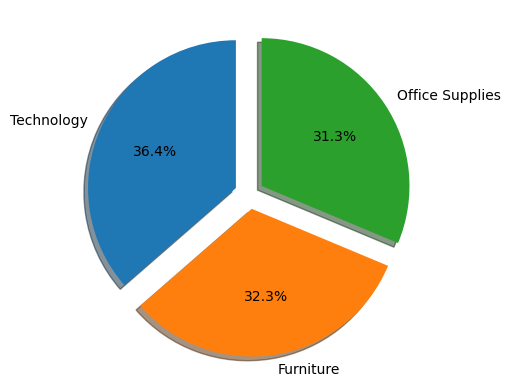

In [189]:
plt.pie(top_product_category['Sales'], labels=top_product_category['Category'], autopct='%1.1f%%', shadow=True, explode=[0.1,0.1,0.1], startangle=90);

<BarContainer object of 17 artists>

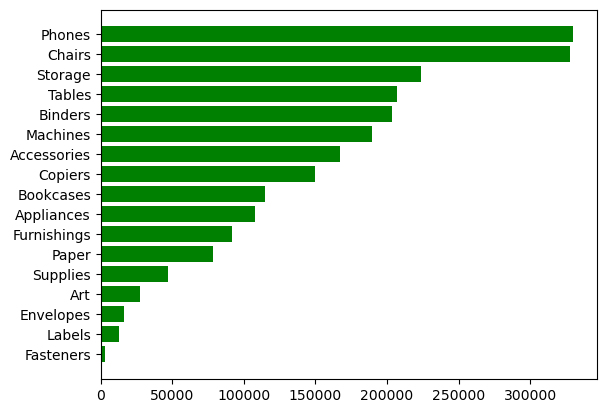

In [ ]:
subcategory_count_sales = subcategory_count_sales.sort_values(by='Sales', ascending=True)
plt.barh(subcategory_count_sales['Sub-Category'], subcategory_count_sales['Sales'], color='green')

# Time Series Analysis

* Which Month has the highest sales?
* Which Year has the highest Sales?

In [ ]:
yearly_sales = df.groupby(['Order Year'], observed=True)['Sales'].sum().reset_index()
print(yearly_sales)

   Order Year        Sales
0        2014  483966.1261
1        2015  470532.5090
2        2016  609205.5980
3        2017  733215.2552


<BarContainer object of 4 artists>

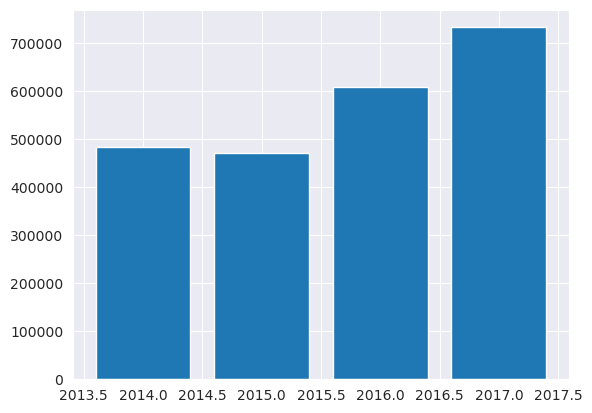

In [ ]:
plt.bar(yearly_sales['Order Year'], yearly_sales['Total Revenue'],)

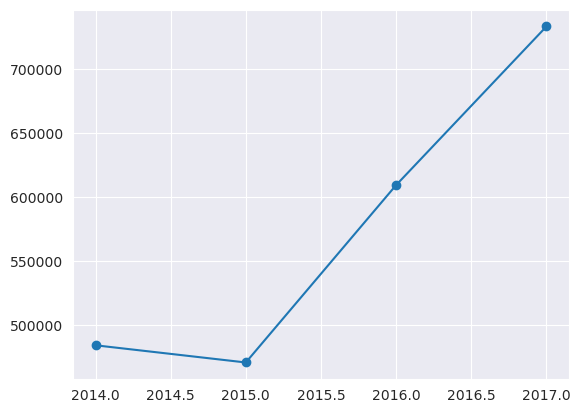

In [ ]:
plt.plot(yearly_sales['Order Year'], yearly_sales['Total Revenue'], marker="o")

In [ ]:
sales_per_month = df.groupby(['Order Year','Order Month'], observed=True)['Total Revenue'].sum().reset_index()
print(sales_per_month)

    Order Year  Order Month  Total Revenue
0         2014            1     14236.8950
1         2014            2      4519.8920
2         2014            3     55691.0090
3         2014            4     28013.9730
4         2014            5     23648.2870
5         2014            6     34595.1276
6         2014            7     33946.3930
7         2014            8     27909.4685
8         2014            9     81777.3508
9         2014           10     31453.3930
10        2014           11     78628.7167
11        2014           12     69545.6205
12        2015            1     18174.0756
13        2015            2     11951.4110
14        2015            3     38726.2520
15        2015            4     34195.2085
16        2015            5     30131.6865
17        2015            6     24797.2920
18        2015            7     28765.3250
19        2015            8     36898.3322
20        2015            9     64595.9180
21        2015           10     31404.9235
22        2

In [ ]:
# Which month has the highest sales
sales_per_month = df.groupby('Order Month(N)', observed=True)['Sales'].sum().reset_index()
sales_per_month = sales_per_month.rename(columns={'Sales':'Total Sales'})
sales_per_month = sales_per_month.sort_values(by='Total Sales', ascending=True)
print(sales_per_month)

   Order Month(N)  Total Sales
3        February   59751.2514
4         January   94924.8356
0           April  137480.7566
5            July  147238.0970
6            June  152718.6793
8             May  155028.8117
1          August  159044.0630
10        October  200322.9847
7           March  205005.4888
11      September  307649.9457
2        December  325293.5035
9        November  352461.0710


In [184]:
sales_trends = df.groupby(['Order Year', 'Order Month(N)', 'Segment'], observed=True)['Sales'].sum().unstack()
sales_trends

Segment                      Consumer   Corporate  Home Office
Order Year Order Month(N)                                     
2014       April            9108.6120  14131.7290    4773.6320
           August          16215.2635   7451.7740    4242.4310
           December        37357.9865  20573.5560   11614.0780
           February         3167.8540   1183.6680     168.3700
           January          6927.8170   1701.5280    5607.5500
           July            20197.7400  10032.9880    3715.6650
           June            25923.7476   3970.9140    4700.4660
           March           11869.3040  11106.7990   32714.9060
           May             12819.1630   9142.0000    1687.1240
           November        46571.9780  20994.4947   11062.2440
           October         16246.6970  12637.6780    2569.0180
           September       59690.6500  15507.7450    6578.9558
2015       April           22626.4055   4121.0440    7447.7590
           August          20589.8350  11455.7592    4852.7380
           December        39568.3310  16299.4610   19051.7292
           February         9269.0180   2565.2570     117.1360
           January         14274.9836   3382.4640     516.6280
           July            19948.8130   7191.7000    1624.8120
           June            12824.5040   9404.0890    2568.6990
           March           17418.8900  16332.0184    4975.3436
           May             20879.1790   5454.9395    3797.5680
           November        33146.8327  27299.6448   15526.0860
           October         17128.8685   8646.3690    5629.6860
           September       38860.2730  16604.5610    9131.0840
2016       April           14075.2480  16177.3760    8497.4150
           August          13885.5638  12943.4705    4286.3400
           December        49294.9890  35570.8260   12133.2280
           February        15800.2270   2866.8840    4311.7040
           January          6026.6490   9485.1240    3030.7180
           July            22631.8470  13168.9190    3461.1970
           June            23888.8110   7788.4940    8667.2290
           March           24844.9910  14226.4730   12644.4110
           May             32174.6350  18452.2580    6360.8350
           November        41449.8628  26493.1800   11468.9230
           October         10143.2820  32130.5450   17413.9180
           September       42647.7936  17802.8123   12959.4190
2017       April            9034.9240  14803.0146   12683.5975
           August          31629.1440  25678.4440    5813.3000
           December        50232.4558  20524.4320   13072.4310
           February         5589.0770   7959.2580    6752.7984
           January         23211.8410  12221.2320    8538.3010
           July            18991.3730  16525.5990    9747.4440
           June            20273.1177  19695.0400   13013.5680
           March           35041.5220  16574.6228    7256.2080
           May             21059.7374  14239.8348    8961.5380
           November        49790.0648  44644.0762   24013.6840
           October         23194.2402  24877.1680   29705.5150
           September       43857.2030  24105.1030   19904.3460

<BarContainer object of 12 artists>

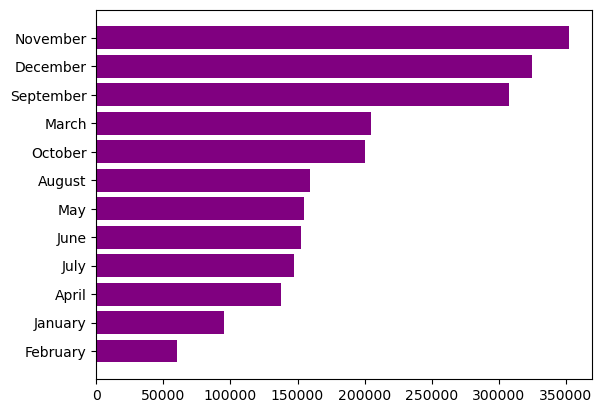

In [ ]:
plt.barh(sales_per_month['Order Month(N)'],sales_per_month['Total Sales'], color='purple')

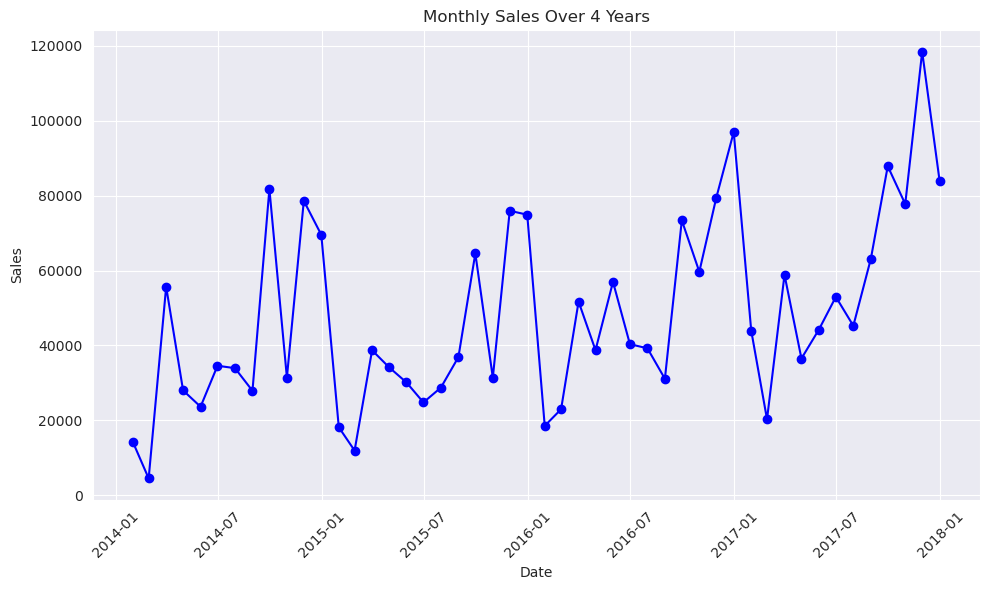

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Set the date column as the index (useful for time series analysis)
#df.set_index('Order Date', inplace=True)

# Step 3: Resample the data by month and sum up sales for each month
monthly_sales = df.resample('ME')['Total Revenue'].sum()

# Step 4: Plot the monthly sales data over 4 years
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='b')

# Step 5: Customize the plot
plt.title('Monthly Sales Over 4 Years')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
df.to_csv('cleaned_sales_data.csv', index=False)